# Random Variables Practice - RV

## Bernoulli RV

- $X \sim Bern(p)$
- $P(X=1) = p$
- $P(X=0) = 1-p$

The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by $x=0$ and $x=1$, where $x=1$ is called a "success" and $x=0$ is called a "failure". The probability of success is $p$ and the probability of failure is $1-p$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bernoulli_trail(p:float =0.5):
    X: bool = int(np.random.rand() <= p)
    return X

Here we define a function in Python to generate a Bernoulli random variable.
The variable will assume the value 1 with probability $p$ and the value 0 with probability $1-p$.

In this case the probability is given by a parameter $p$. Which is 0.5 by default, but we can change it.

In [3]:
print(bernoulli_trail())

0


Smaller the $p$ value, smaller the probability of success.

In [4]:
print(bernoulli_trail(p=0.3))

1


In [5]:
countOnes = 0
countZeros = 0

for i in range(1000):
    X = bernoulli_trail()
    if X == 1:
        countOnes += 1
    else:
        countZeros += 1

print(f'The number of ones is {countOnes}\nThe number of zeros is {countZeros}\nThe probability was 0.5 and the number of trials was 1000\nThe success rate is {countOnes/1000}')

The number of ones is 508
The number of zeros is 492
The probability was 0.5 and the number of trials was 1000
The success rate is 0.508


If the next ball brings a six in a cricket match then team A wins and not otherwise. Can this be modeled by a Bernoulli random variable?

Yes, it can be modeled by a Bernoulli random variable. The random variable $X$ can be defined as follows:

$X = 1$ if the next ball brings a six

$X = 0$ if the next ball does not bring a six

$Y = 1$ if the next ball brings a six

$Y = 0$ if the next ball does not bring a six

The probability of success is $p = (P(Y))$

## Geometric RV

- $X \sim Geom(p)$
- $P(X=k) = (1-p)^{k-1}p$
- $k = 1,2,3,...$

The Geometric distribution is a discrete distribution having two possible outcomes labelled by $x=1,2,3,...$, where $x=1$ is called a "success" and $x=0$ is called a "failure". The probability of success is $p$ and the probability of failure is $1-p$.

In [6]:
def geometric_trail(p: float = 0.5) -> int:
    X: int = 0 # number of failures before the first success
    while True:
        if bernoulli_trail(p) == 1: # if success
            return X # return the number of failures before the first success
        X = X + 1

In [7]:
p = 0.7
print(f'The probability of success is {p}')
print(f'The number of failures before the first success is {geometric_trail(p)}')

The probability of success is 0.7
The number of failures before the first success is 0


If we reduce the probability of success, the probability of failure increases. This is because the sum of the probabilities of success and failure is 1.

In [8]:
p = 0.3
print(f'The probability of success is {p}')
print(f'The number of failures before the first success is {geometric_trail(p)}')

The probability of success is 0.3
The number of failures before the first success is 3


In [9]:
n = 1000
p = 0.6

G = np.zeros(n)

for i in range(n):
    G[i] = geometric_trail(p)

print(f'The mean of the geometric distribution is {np.mean(G)}')

The mean of the geometric distribution is 0.736


In [10]:
import seaborn as sns 

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pcmoraes/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


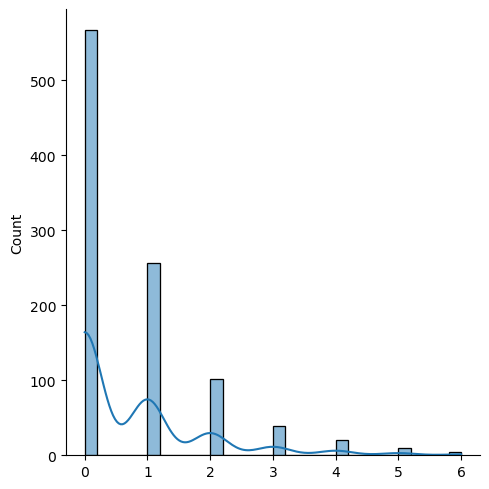

In [11]:
sns.displot(G, kde=True)

## Binomial RV

- $X \sim Bin(n,p)$

The Binomial distribution is a discrete distribution having two possible outcomes labelled by $x=0,1,2,...,n$, where $x=1$ is called a "success" and $x=0$ is called a "failure". The probability of success is $p$ and the probability of failure is $1-p$.

The Binomial distribution is the sum of $n$ independent Bernoulli random variables.



In [12]:
def binomial_trail(n: int, p: float = 0.5) -> int:
    X = (np.random.rand(n) <=p).sum()

## OR 

def binomial_trail(n: int, p: float = 0.5) -> int:
    X = 0
    for i in range(n):
        X = X + bernoulli_trail(p)
    return X

In [13]:
print(f'The number of successes is {binomial_trail(1000, 0.6)}')

The number of successes is 599


## Gaussian RV

- $X \sim N(\mu,\sigma^2)$

The Gaussian distribution is a continuous distribution having two parameters $\mu$ and $\sigma^2$.

The Gaussian distribution is also called the Normal distribution.

The Gaussian distribution is the limit of the Binomial distribution as $n \rightarrow \infty$.


In [43]:
x: np.array = np.linspace(-20,20, 10000)
mu: float = 0
sgma: float = 1
fx: np.array = np.exp((-(x-mu)**2)/(2*(sgma**2))**0.5)

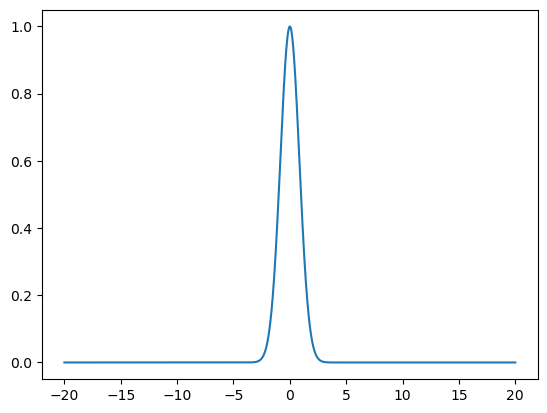

In [44]:
plt.plot(x, fx)

When the mu is 0 and sigma is 1, it is called standard normal distribution. You can see at the graphic that the mean is 0 and the standard deviation is 1.

In [30]:
x = np.linspace(-20,20, 10000)
mu = 5
sgma = 1
fx = np.exp((-(x-mu)**2)/(2*(sgma**2))**0.5)

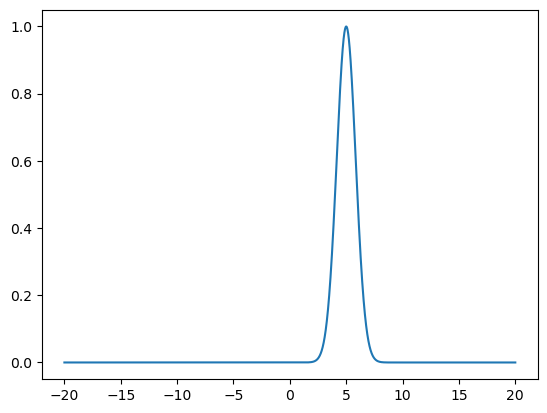

In [31]:
plt.plot(x, fx)

As long we change the mu to +$\infty$ the graphic will move to the right and if we change the mu to -$\infty$ the graphic will move to the left. 

In [36]:
x = np.linspace(-20,20, 10000)
mu = 1
sgma = 5
fx = np.exp((-(x-mu)**2)/(2*(sgma**2))**0.5)

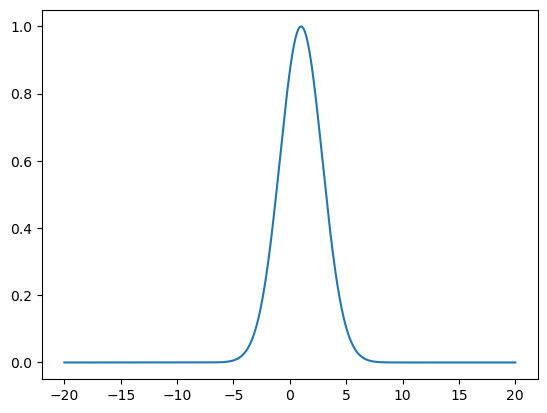

In [37]:
plt.plot(x, fx)

When we change the sigma to +$\infty$ the graphic will be more flat and if we change the sigma to -$\infty$ the graphic will be more thin.

In [38]:
x = np.linspace(-20,20, 10000)
mu = 1
sgma = 0
fx = np.exp((-(x-mu)**2)/(2*(sgma**2))**0.5)

/tmp/ipykernel_25560/2072655820.py:4: RuntimeWarning: divide by zero encountered in divide
  fx = np.exp((-(x-mu)**2)/(2*(sgma**2))**0.5)


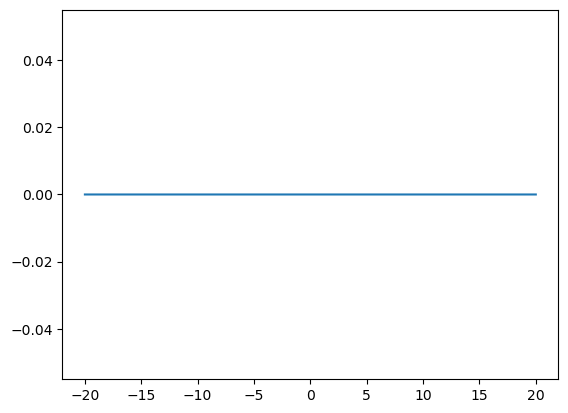

In [39]:
plt.plot(x, fx)

We can't have zero value for sigma because it will be a line and not a graphic.